In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup as BS
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import folium

In [2]:
response=requests.get('https://en.wikipedia.org/wiki/List_of_deadly_earthquakes_since_1900')

In [3]:
result_text=response.text

In [4]:
print(type(response))
print(type(result_text))

<class 'requests.models.Response'>
<class 'str'>


In [5]:
result_text

'<!DOCTYPE html>\n<html class="client-nojs" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>List of deadly earthquakes since 1900 - Wikipedia</title>\n<script>document.documentElement.className = document.documentElement.className.replace( /(^|\\s)client-nojs(\\s|$)/, "$1client-js$2" );</script>\n<script>(window.RLQ=window.RLQ||[]).push(function(){mw.config.set({"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"List_of_deadly_earthquakes_since_1900","wgTitle":"List of deadly earthquakes since 1900","wgCurRevisionId":840128723,"wgRevisionId":840128723,"wgArticleId":11673441,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles needing additional references from July 2017","All articles needing additional references","Articles needing cleanup from July 2017","All pages needing cleanup","Cleanup tagged articles with a reason field from July 2017","Wikipedia pag

In [6]:
soup = BS(result_text, 'html.parser')

In [7]:
# looks for wikitable first table does not contain valuable information
table = soup.find_all('table',{'class':'sortable wikitable'})

In [8]:
type(table)

bs4.element.ResultSet

In [9]:
df=pd.read_html(str(table)) #converts html table into dataframe

In [10]:
df

[                    0                                                  1   \
 0         Origin (UTC)  Present-day country and link to Wikipedia article   
 1     1900-05-11 17:23                                              Japan   
 2     1900-07-12 06:25                                             Turkey   
 3     1900-10-29 09:11                                          Venezuela   
 4     1901-02-15 00:00                                              China   
 5     1901-03-31 07:11                                           Bulgaria   
 6     1901-08-09 09:23                                              Japan   
 7     1901-11-15 20:15          New Zealand (see 1901 Cheviot earthquake)   
 8     1902-01-30 14:01                                              Japan   
 9     1902-02-13 09:39                                         Azerbaijan   
 10    1902-03-09 07:46                                             Turkey   
 11    1902-04-19 02:23          Guatemala (see 1902 Guatemala e

In [11]:
df=df[0] #selects 1st table (I think this happens to be the only table)

In [12]:
df

,0,1,2,3,4,5,6,7,8,9,10,11
0,Origin (UTC),Present-day country and link to Wikipedia article,Lat,Long,Depth (km),Magnitude,Secondary Effects,PDE Shaking Deaths,PDE Total Deaths,Utsu Total Deaths,EM-DAT Total Deaths,Other Source Deaths
1,1900-05-11 17:23,Japan,38.700,141.100,5,7.0 MJMA,NaN,NaN,NaN,NaN,NaN,NaN
2,1900-07-12 06:25,Turkey,40.300,43.100,NaN,5.9 Muk,NaN,NaN,NaN,140,NaN,NaN
3,1900-10-29 09:11,Venezuela,11.000,-66.000,0,7.7 Mw,NaN,NaN,NaN,NaN,NaN,NaN
4,1901-02-15 00:00,China,26.000,100.100,0,6.5 Ms,NaN,NaN,NaN,NaN,NaN,NaN
5,1901-03-31 07:11,Bulgaria,43.400,28.700,NaN,6.4 Muk,NaN,NaN,NaN,4,NaN,NaN
6,1901-08-09 09:23,Japan,40.500,142.500,35,7.2 Mw,T,NaN,NaN,NaN,NaN,NaN
7,1901-11-15 20:15,New Zealand (see 1901 Cheviot earthquake),-43.000,173.000,0,6.8 Ms,NaN,NaN,NaN,1,NaN,NaN
8,1902-01-30 14:01,Japan,40.500,141.300,35,6.9 Ms,NaN,NaN,NaN,1,NaN,NaN
9,1902-02-13 09:39,Azerbaijan,40.700,48.600,15,6.9 Muk,NaN,NaN,NaN,86,NaN,NaN


In [13]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11
count,1341,1341,1327,1327,1251,1340,374,740,751,1028,561,38
unique,1338,393,1235,1278,434,177,13,143,155,279,203,36
top,1990-05-05 07:21,China,40.000,102.300,35,7.2 Mw,L,1,1,1,1,1
freq,2,133,6,3,112,46,165,156,192,171,61,3


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1341 entries, 0 to 1340
Data columns (total 12 columns):
0     1341 non-null object
1     1341 non-null object
2     1327 non-null object
3     1327 non-null object
4     1251 non-null object
5     1340 non-null object
6     374 non-null object
7     740 non-null object
8     751 non-null object
9     1028 non-null object
10    561 non-null object
11    38 non-null object
dtypes: object(12)
memory usage: 125.8+ KB


In [15]:
# converts all missing values to NaN
df1=df.replace(r'\s+$', np.nan, regex=True)

In [16]:
df1.describe()

,0,1,2,3,4,5,6,7,8,9,10,11
count,1341,1341,1327,1327,1251,1340,374,740,751,1028,561,38
unique,1338,393,1235,1278,434,177,13,143,155,279,203,36
top,1990-05-05 07:21,China,40.000,102.300,35,7.2 Mw,L,1,1,1,1,1
freq,2,133,6,3,112,46,165,156,192,171,61,3


In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1341 entries, 0 to 1340
Data columns (total 12 columns):
0     1341 non-null object
1     1341 non-null object
2     1327 non-null object
3     1327 non-null object
4     1251 non-null object
5     1340 non-null object
6     374 non-null object
7     740 non-null object
8     751 non-null object
9     1028 non-null object
10    561 non-null object
11    38 non-null object
dtypes: object(12)
memory usage: 125.8+ KB


In [18]:
df1
# As you note, all missing values are filled in with NaN already.  No visible change between df and df1.  
# will continue to use df

,0,1,2,3,4,5,6,7,8,9,10,11
0,Origin (UTC),Present-day country and link to Wikipedia article,Lat,Long,Depth (km),Magnitude,Secondary Effects,PDE Shaking Deaths,PDE Total Deaths,Utsu Total Deaths,EM-DAT Total Deaths,Other Source Deaths
1,1900-05-11 17:23,Japan,38.700,141.100,5,7.0 MJMA,NaN,NaN,NaN,NaN,NaN,NaN
2,1900-07-12 06:25,Turkey,40.300,43.100,NaN,5.9 Muk,NaN,NaN,NaN,140,NaN,NaN
3,1900-10-29 09:11,Venezuela,11.000,-66.000,0,7.7 Mw,NaN,NaN,NaN,NaN,NaN,NaN
4,1901-02-15 00:00,China,26.000,100.100,0,6.5 Ms,NaN,NaN,NaN,NaN,NaN,NaN
5,1901-03-31 07:11,Bulgaria,43.400,28.700,NaN,6.4 Muk,NaN,NaN,NaN,4,NaN,NaN
6,1901-08-09 09:23,Japan,40.500,142.500,35,7.2 Mw,T,NaN,NaN,NaN,NaN,NaN
7,1901-11-15 20:15,New Zealand (see 1901 Cheviot earthquake),-43.000,173.000,0,6.8 Ms,NaN,NaN,NaN,1,NaN,NaN
8,1902-01-30 14:01,Japan,40.500,141.300,35,6.9 Ms,NaN,NaN,NaN,1,NaN,NaN
9,1902-02-13 09:39,Azerbaijan,40.700,48.600,15,6.9 Muk,NaN,NaN,NaN,86,NaN,NaN


In [19]:
df == df1 #Why are there false values

,0,1,2,3,4,5,6,7,8,9,10,11
0,True,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,False,False,False,False,False,False
2,True,True,True,True,False,True,False,False,False,True,False,False
3,True,True,True,True,True,True,False,False,False,False,False,False
4,True,True,True,True,True,True,False,False,False,False,False,False
5,True,True,True,True,False,True,False,False,False,True,False,False
6,True,True,True,True,True,True,True,False,False,False,False,False
7,True,True,True,True,True,True,False,False,False,True,False,False
8,True,True,True,True,True,True,False,False,False,True,False,False
9,True,True,True,True,True,True,False,False,False,True,False,False


In [20]:
df.iloc[1340,-1]

'601 (as of October 30, 2011)'

In [21]:
# Need to remove all "footnotes" from values in column

In [22]:
type(df.iloc[1340,-1])

str

In [23]:
OSDsep=df.iloc[:,11].str.partition('[')

In [24]:
OSDsep.head()

,0,1,2
0,Other Source Deaths,,
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN


In [25]:
OSDsep1=OSDsep.iloc[:,0]

In [26]:
print(OSDsep1.head())

0    Other Source Deaths
1                    NaN
2                    NaN
3                    NaN
4                    NaN
Name: 0, dtype: object


In [27]:
OSDsep2=OSDsep1.str.partition('(')

In [28]:
OSDsep2.tail()

,0,1,2
1336,15894,,
1337,150+,,
1338,NaN,NaN,NaN
1339,111+,,
1340,601,(,"as of October 30, 2011)"


In [29]:
OSDsep3=OSDsep2[0].str.partition('+')

In [30]:
OSDsep3.tail()

,0,1,2
1336,15894,,
1337,150,+,
1338,NaN,NaN,NaN
1339,111,+,
1340,601,,


In [31]:
OSDsep4=OSDsep3[0]

In [32]:
OSDsep4.describe()

count     38
unique    36
top        1
freq       3
Name: 0, dtype: object

In [33]:
type(OSDsep4)

pandas.core.series.Series

In [34]:
# df.iloc[:,11].replace(to_replace=OSDsep4)
df.iloc[:,11]=OSDsep4

In [35]:
df.tail()

,0,1,2,3,4,5,6,7,8,9,10,11
1336,2011-03-11 14:46,Japan (see 2011 Tōhoku earthquake),38.322,142.369,24.4,9.0 Mw,T,NaN,NaN,NaN,NaN,15894
1337,2011-03-24 20:25,Burma (see 2011 Burma earthquake),NaN,NaN,NaN,6.8 Mw,NaN,NaN,NaN,NaN,NaN,150
1338,2011-04-07 14:32,Japan (see April 2011 Miyagi earthquake),38.2,140.0,66.0,7.1 Mw,NaN,NaN,NaN,NaN,NaN,NaN
1339,2011-09-18 12:40,India (see 2011 Sikkim earthquake),27.723,88.064,19.7,6.9 Mw,L,NaN,NaN,NaN,NaN,111
1340,2011-09-23 10:41,Turkey (see 2011 Van earthquake),38.6,43.5,7.2,7.1 Mw,NaN,NaN,NaN,NaN,NaN,601


In [36]:
type(df.iloc[1335,-1])# went to previous steps to change str to float 

float

In [37]:
df.iloc[:,11]=pd.to_numeric(df.iloc[:,11],errors='coerce')

In [38]:
type(df.iloc[1340,-1])

numpy.float64

In [39]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,Origin (UTC),Present-day country and link to Wikipedia article,Lat,Long,Depth (km),Magnitude,Secondary Effects,PDE Shaking Deaths,PDE Total Deaths,Utsu Total Deaths,EM-DAT Total Deaths,NaN
1,1900-05-11 17:23,Japan,38.700,141.100,5,7.0 MJMA,NaN,NaN,NaN,NaN,NaN,NaN
2,1900-07-12 06:25,Turkey,40.300,43.100,NaN,5.9 Muk,NaN,NaN,NaN,140,NaN,NaN
3,1900-10-29 09:11,Venezuela,11.000,-66.000,0,7.7 Mw,NaN,NaN,NaN,NaN,NaN,NaN
4,1901-02-15 00:00,China,26.000,100.100,0,6.5 Ms,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
df.tail()

,0,1,2,3,4,5,6,7,8,9,10,11
1336,2011-03-11 14:46,Japan (see 2011 Tōhoku earthquake),38.322,142.369,24.4,9.0 Mw,T,NaN,NaN,NaN,NaN,15894.0
1337,2011-03-24 20:25,Burma (see 2011 Burma earthquake),NaN,NaN,NaN,6.8 Mw,NaN,NaN,NaN,NaN,NaN,150.0
1338,2011-04-07 14:32,Japan (see April 2011 Miyagi earthquake),38.2,140.0,66.0,7.1 Mw,NaN,NaN,NaN,NaN,NaN,NaN
1339,2011-09-18 12:40,India (see 2011 Sikkim earthquake),27.723,88.064,19.7,6.9 Mw,L,NaN,NaN,NaN,NaN,111.0
1340,2011-09-23 10:41,Turkey (see 2011 Van earthquake),38.6,43.5,7.2,7.1 Mw,NaN,NaN,NaN,NaN,NaN,601.0


In [41]:
df.columns

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], dtype='int64')

In [42]:
df.iloc[0,11]='Other Source Deaths'

In [43]:
df.iloc[0,11]

'Other Source Deaths'

In [44]:
df.columns=df.iloc[0,:]

In [45]:
df.columns

Index(['Origin (UTC)', 'Present-day country and link to Wikipedia article',
       'Lat', 'Long', 'Depth (km)', 'Magnitude', 'Secondary Effects',
       'PDE Shaking Deaths', 'PDE Total Deaths', 'Utsu Total Deaths',
       'EM-DAT Total Deaths', 'Other Source Deaths'],
      dtype='object', name=0)

In [46]:
df.head()#should I delete row 0 now that I've changed the column names to reflect what was in row 0

,Origin (UTC),Present-day country and link to Wikipedia article,Lat,Long,Depth (km),Magnitude,Secondary Effects,PDE Shaking Deaths,PDE Total Deaths,Utsu Total Deaths,EM-DAT Total Deaths,Other Source Deaths
0,Origin (UTC),Present-day country and link to Wikipedia article,Lat,Long,Depth (km),Magnitude,Secondary Effects,PDE Shaking Deaths,PDE Total Deaths,Utsu Total Deaths,EM-DAT Total Deaths,Other Source Deaths
1,1900-05-11 17:23,Japan,38.700,141.100,5,7.0 MJMA,NaN,NaN,NaN,NaN,NaN,NaN
2,1900-07-12 06:25,Turkey,40.300,43.100,NaN,5.9 Muk,NaN,NaN,NaN,140,NaN,NaN
3,1900-10-29 09:11,Venezuela,11.000,-66.000,0,7.7 Mw,NaN,NaN,NaN,NaN,NaN,NaN
4,1901-02-15 00:00,China,26.000,100.100,0,6.5 Ms,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
mag=df.iloc[:,5].str.partition(' ')

In [48]:
mag.head(3)

,0,1,2
0,Magnitude,,
1,7.0,,MJMA
2,5.9,,Muk


In [49]:
df.iloc[:,5]=mag[0] #Assume magnitude variables (i.e. Muk, Mk, etc are neglible regardless
# of differing scales)
df.head()

,Origin (UTC),Present-day country and link to Wikipedia article,Lat,Long,Depth (km),Magnitude,Secondary Effects,PDE Shaking Deaths,PDE Total Deaths,Utsu Total Deaths,EM-DAT Total Deaths,Other Source Deaths
0,Origin (UTC),Present-day country and link to Wikipedia article,Lat,Long,Depth (km),Magnitude,Secondary Effects,PDE Shaking Deaths,PDE Total Deaths,Utsu Total Deaths,EM-DAT Total Deaths,Other Source Deaths
1,1900-05-11 17:23,Japan,38.700,141.100,5,7.0,NaN,NaN,NaN,NaN,NaN,NaN
2,1900-07-12 06:25,Turkey,40.300,43.100,NaN,5.9,NaN,NaN,NaN,140,NaN,NaN
3,1900-10-29 09:11,Venezuela,11.000,-66.000,0,7.7,NaN,NaN,NaN,NaN,NaN,NaN
4,1901-02-15 00:00,China,26.000,100.100,0,6.5,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
df.columns

Index(['Origin (UTC)', 'Present-day country and link to Wikipedia article',
       'Lat', 'Long', 'Depth (km)', 'Magnitude', 'Secondary Effects',
       'PDE Shaking Deaths', 'PDE Total Deaths', 'Utsu Total Deaths',
       'EM-DAT Total Deaths', 'Other Source Deaths'],
      dtype='object', name=0)

In [51]:
type(df.iloc[4,5])

str

In [52]:
# df.iloc[:,2]=pd.to_numeric(df.iloc[:,11],errors='coerce')
# df.iloc[:,3]=pd.to_numeric(df.iloc[:,11],errors='coerce')
# df.iloc[:,4]=pd.to_numeric(df.iloc[:,11],errors='coerce')
df.iloc[:,5]=pd.to_numeric(df.iloc[:,5],errors='coerce')
df.iloc[:,6]=pd.to_numeric(df.iloc[:,6],errors='coerce')
df.iloc[:,7]=pd.to_numeric(df.iloc[:,7],errors='coerce')
df.iloc[:,8]=pd.to_numeric(df.iloc[:,8],errors='coerce')
df.iloc[:,9]=pd.to_numeric(df.iloc[:,9],errors='coerce')
df.iloc[:,10]=pd.to_numeric(df.iloc[:,10],errors='coerce')
df.iloc[:,11]=pd.to_numeric(df.iloc[:,11],errors='coerce')

In [53]:
df.head(3)

,Origin (UTC),Present-day country and link to Wikipedia article,Lat,Long,Depth (km),Magnitude,Secondary Effects,PDE Shaking Deaths,PDE Total Deaths,Utsu Total Deaths,EM-DAT Total Deaths,Other Source Deaths
0,Origin (UTC),Present-day country and link to Wikipedia article,Lat,Long,Depth (km),NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1900-05-11 17:23,Japan,38.700,141.100,5,7.0,NaN,NaN,NaN,NaN,NaN,NaN
2,1900-07-12 06:25,Turkey,40.300,43.100,NaN,5.9,NaN,NaN,NaN,140.0,NaN,NaN


In [54]:
type(df.iloc[1,11])

numpy.float64

In [55]:
df['deaths']=df.iloc[:,8:].apply(np.max,axis=1)
# df.rename(mapper={"Present-day country and link to Wikipedia article":"Country"})
df.columns =['Origin(UTC)','Country','Lat','Long','Depth(km)','Magnitude','Secondary Effects', 'PDE Shaking Deaths', 'PDE Total Deaths', 'Utsu Total Deaths', 'EM-DAT Total Deaths', 'Other Source Deaths','deaths']   
df['Country'].str.replace(r" ?\([^)]+\)", "",regex=True).unique()

df

,Origin(UTC),Country,Lat,Long,Depth(km),Magnitude,Secondary Effects,PDE Shaking Deaths,PDE Total Deaths,Utsu Total Deaths,EM-DAT Total Deaths,Other Source Deaths,deaths
0,Origin (UTC),Present-day country and link to Wikipedia article,Lat,Long,Depth (km),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1900-05-11 17:23,Japan,38.700,141.100,5,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1900-07-12 06:25,Turkey,40.300,43.100,NaN,5.9,NaN,NaN,NaN,140.0,NaN,NaN,140.0
3,1900-10-29 09:11,Venezuela,11.000,-66.000,0,7.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1901-02-15 00:00,China,26.000,100.100,0,6.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1901-03-31 07:11,Bulgaria,43.400,28.700,NaN,6.4,NaN,NaN,NaN,4.0,NaN,NaN,4.0
6,1901-08-09 09:23,Japan,40.500,142.500,35,7.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1901-11-15 20:15,New Zealand (see 1901 Cheviot earthquake),-43.000,173.000,0,6.8,NaN,NaN,NaN,1.0,NaN,NaN,1.0
8,1902-01-30 14:01,Japan,40.500,141.300,35,6.9,NaN,NaN,NaN,1.0,NaN,NaN,1.0
9,1902-02-13 09:39,Azerbaijan,40.700,48.600,15,6.9,NaN,NaN,NaN,86.0,NaN,NaN,86.0


In [56]:
fix2=df['Country'].str.partition('(')
df['Country']=fix2.iloc[:,0]
df.tail()

,Origin(UTC),Country,Lat,Long,Depth(km),Magnitude,Secondary Effects,PDE Shaking Deaths,PDE Total Deaths,Utsu Total Deaths,EM-DAT Total Deaths,Other Source Deaths,deaths
1336,2011-03-11 14:46,Japan,38.322,142.369,24.4,9.0,NaN,NaN,NaN,NaN,NaN,15894.0,15894.0
1337,2011-03-24 20:25,Burma,NaN,NaN,NaN,6.8,NaN,NaN,NaN,NaN,NaN,150.0,150.0
1338,2011-04-07 14:32,Japan,38.2,140.0,66.0,7.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1339,2011-09-18 12:40,India,27.723,88.064,19.7,6.9,NaN,NaN,NaN,NaN,NaN,111.0,111.0
1340,2011-09-23 10:41,Turkey,38.6,43.5,7.2,7.1,NaN,NaN,NaN,NaN,NaN,601.0,601.0


In [57]:
# df['deaths']= df.iloc[:,8:].max()
# df.agg("max", axis="columns")
# list1=df['PDE Total Deaths']
# list2=df['Utsu Total Deaths']
# list3=df['EM-DAT Total Deaths']
# list4=df['Other Source Deaths']

# def function(list1,list2,list3,list4): #def returns 5th list 
#     df['deaths'] = [max(value) for value in zip(list1, list2, list3, list4)]
#     return df['deaths']
# print(function(list1,list2,list3,list4))

Data Question3
- Nate Silver discusses the difficulty of predicting earthquakes in **The Signal and the Noise**, but are there factors that make an earthquake more likely? 
- Are there factors that make an earthquake more deadly? 
- Where would you live if you wanted to eliminate the risk of experiencing an earthquake? 
- Where would you avoid living?

Read the table of earthquakes from https://en.wikipedia.org/wiki/List_of_deadly_earthquakes_since_1900 using *beautifulsoup* and load it to a pandas dataframe. An introduction to the request and beautifulsoup libraries is provided in `TuringAward_soup.ipynb`.

Consider
 - Define "Deadly"

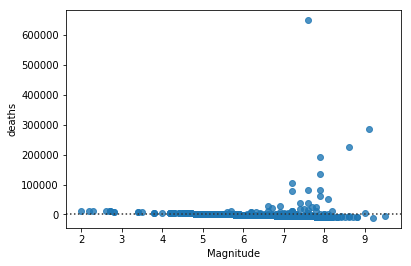

In [58]:
sns.residplot(x=df.Magnitude,y=df.deaths,data=df.deaths)

In [59]:
# sns.stripplot(x=df.Country,y=df.Magnitude,data=df.Magnitude,jitter=True)
# sns.jointplot(x=df.Country, y=df.Magnitude, data=df.Magnitude,kind='scatter')
# plt.plot(df.Country,df.Magnitude)
# mag=df.Magnitude
# death=df.deaths
# place=df.Country
# # plt.plot(place,mag)
# df.plot(kind='bar',x=Country,y=Magnitude)
# plt.show()

In [60]:
Max_death=df['deaths'].max()
maxdeath=df.loc[df['deaths']==Max_death]
print(maxdeath)
#Why is this value so much higher than all the other death values?  Perhaps there's a greater population density?
#building structures?

          Origin(UTC) Country     Lat     Long Depth(km)  Magnitude  \
584  1976-07-27 19:42  China   39.605  117.888      16.7        7.6   

     Secondary Effects  PDE Shaking Deaths  PDE Total Deaths  \
584                NaN            655237.0          655237.0   

     Utsu Total Deaths  EM-DAT Total Deaths  Other Source Deaths    deaths  
584           242800.0             242000.0                  NaN  655237.0  


Consider reviewing average deaths by country over the years....  Where does China fall in to that with this ID#584 
 and without....

In [61]:
# rolling_df_max=rolling_df.groupby('User').max().reset_index()
# rolling_df_max.head()
Country=df.groupby('Country').mean()
print(Country)

                                      Magnitude  Secondary Effects  \
Country                                                              
                                       6.900000                NaN   
Afghanistan                            6.168000                NaN   
Afghanistan                            6.460000                NaN   
Albania                                5.871429                NaN   
Algeria                                5.615789                NaN   
Algeria                                6.500000                NaN   
Argentina                              6.660000                NaN   
Argentina                              6.633333                NaN   
Armenia                                6.300000                NaN   
Armenia                                6.700000                NaN   
Australia                              4.100000                NaN   
Australia                              5.500000                NaN   
Azerbaijan          

In [62]:
type(Country)

pandas.core.frame.DataFrame

In [63]:
Country.head()

,Magnitude,Secondary Effects,PDE Shaking Deaths,PDE Total Deaths,Utsu Total Deaths,EM-DAT Total Deaths,Other Source Deaths,deaths
Country,,,,,,,,
,6.900000,NaN,81.000000,81.000000,81.000000,80.000000,NaN,81.000000
Afghanistan,6.168000,NaN,33.238095,35.285714,95.947368,69.571429,NaN,83.541667
Afghanistan,6.460000,NaN,1468.800000,1498.800000,1872.250000,1635.600000,NaN,1638.800000
Albania,5.871429,NaN,1.000000,1.000000,34.857143,4.000000,NaN,34.857143
Algeria,5.615789,NaN,374.571429,374.642857,396.285714,460.222222,NaN,394.444444


In [64]:
country_count=df['Country'].value_counts()
#How many earthquakes are too many... normalize points and find percentage of earthquakes...
# SumofQ=country_count.sum() --- Duh... total number of rows in df = 1341
country_count=pd.DataFrame(country_count).reset_index()
country_count.columns=['Country', 'Number of Earthquakes']
country_count.head()

,Country,Number of Earthquakes
0,China,133
1,Indonesia,82
2,Iran,78
3,Japan,62
4,Turkey,60


In [65]:
country_count['percentage'] =(country_count['Number of Earthquakes']/1341)*100
country_count.head(50)

,Country,Number of Earthquakes,percentage
0,China,133,9.917972
1,Indonesia,82,6.114840
2,Iran,78,5.816555
3,Japan,62,4.623415
4,Turkey,60,4.474273
5,Peru,48,3.579418
6,Greece,38,2.833706
7,Mexico,37,2.759135
8,Turkey,35,2.609993
9,Philippines,35,2.609993


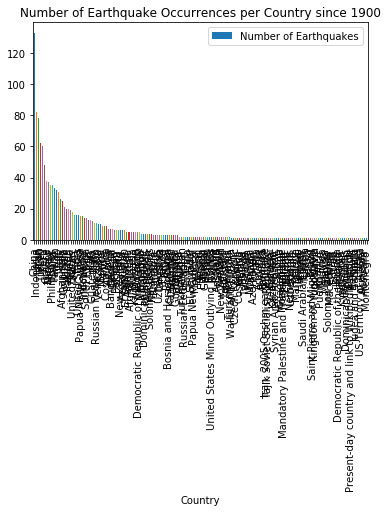

In [66]:
country_count.plot(kind='bar',x='Country', y='Number of Earthquakes', title='Number of Earthquake Occurrences per Country since 1900')
plt.show()

In [67]:
topEQs=country_count.loc[country_count['Number of Earthquakes']>=60]  #presumably 1 every 2-3 years - This parameter
# can be changed

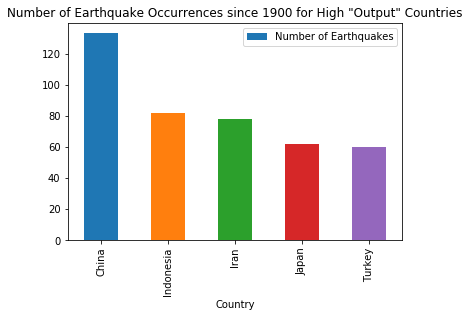

In [68]:
topEQs.plot(kind='bar',x='Country', y='Number of Earthquakes', title='Number of Earthquake Occurrences since 1900 for High "Output" Countries')
plt.show()

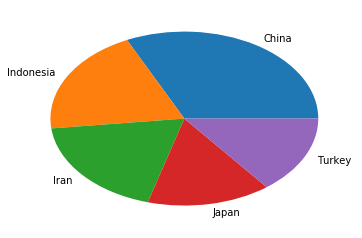

In [69]:
plt.pie(topEQs['percentage'],labels=topEQs['Country'])
plt.title='Percentage of Earthquakes for High "Output" Countries' #Fix title later...
plt.show()

Need to find and compare countries with high death toll

Find tectonic activity and compare to location of earthquakes

In [70]:
#Drop NaN values
# dfnona=df.loc[df['Lat'].notna()]
df.tail()

,Origin(UTC),Country,Lat,Long,Depth(km),Magnitude,Secondary Effects,PDE Shaking Deaths,PDE Total Deaths,Utsu Total Deaths,EM-DAT Total Deaths,Other Source Deaths,deaths
1336,2011-03-11 14:46,Japan,38.322,142.369,24.4,9.0,NaN,NaN,NaN,NaN,NaN,15894.0,15894.0
1337,2011-03-24 20:25,Burma,NaN,NaN,NaN,6.8,NaN,NaN,NaN,NaN,NaN,150.0,150.0
1338,2011-04-07 14:32,Japan,38.2,140.0,66.0,7.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1339,2011-09-18 12:40,India,27.723,88.064,19.7,6.9,NaN,NaN,NaN,NaN,NaN,111.0,111.0
1340,2011-09-23 10:41,Turkey,38.6,43.5,7.2,7.1,NaN,NaN,NaN,NaN,NaN,601.0,601.0


In [72]:
df.head()

,Origin(UTC),Country,Lat,Long,Depth(km),Magnitude,Secondary Effects,PDE Shaking Deaths,PDE Total Deaths,Utsu Total Deaths,EM-DAT Total Deaths,Other Source Deaths,deaths
0,Origin (UTC),Present-day country and link to Wikipedia article,Lat,Long,Depth (km),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1900-05-11 17:23,Japan,38.700,141.100,5,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1900-07-12 06:25,Turkey,40.300,43.100,NaN,5.9,NaN,NaN,NaN,140.0,NaN,NaN,140.0
3,1900-10-29 09:11,Venezuela,11.000,-66.000,0,7.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1901-02-15 00:00,China,26.000,100.100,0,6.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
df.iloc[:,2]=pd.to_numeric(df.iloc[:,2],errors='coerce')
df.iloc[:,3]=pd.to_numeric(df.iloc[:,3],errors='coerce')
df.iloc[:,4]=pd.to_numeric(df.iloc[:,4],errors='coerce')
df.tail()

,Origin(UTC),Country,Lat,Long,Depth(km),Magnitude,Secondary Effects,PDE Shaking Deaths,PDE Total Deaths,Utsu Total Deaths,EM-DAT Total Deaths,Other Source Deaths,deaths
1336,2011-03-11 14:46,Japan,38.322,142.369,24.4,9.0,NaN,NaN,NaN,NaN,NaN,15894.0,15894.0
1337,2011-03-24 20:25,Burma,NaN,NaN,NaN,6.8,NaN,NaN,NaN,NaN,NaN,150.0,150.0
1338,2011-04-07 14:32,Japan,38.200,140.000,66.0,7.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1339,2011-09-18 12:40,India,27.723,88.064,19.7,6.9,NaN,NaN,NaN,NaN,NaN,111.0,111.0
1340,2011-09-23 10:41,Turkey,38.600,43.500,7.2,7.1,NaN,NaN,NaN,NaN,NaN,601.0,601.0


In [85]:
dfmap=df.loc[df['Lat'].notna()]
dfmap.shape

(1325, 13)

In [86]:
dfmap2=dfmap.loc[dfmap['Long'].notna()]
dfmap2.shape

(1325, 13)

In [91]:
world=folium.Map(location=[20,0], tiles="Mapbox Bright", zoom_start=2)
for i in range(0,len(dfmap2)):
#     folium.Marker([dfmap2.iloc[i]['Lat'], dfmap2.iloc[i]['Long']], popup=dfmap2.iloc[i]['Country']).add_to(world)
    folium.Circle(
        location=[dfmap2.iloc[i]['Lat'],dfmap2.iloc[i]['Long']],
        popup=dfmap2.iloc[i]['Country'],
        radius=dfmap2.iloc[i]['Magnitude']*10000,
        color='crimson',
        fill=True,
        fill_color='crimson').add_to(world)
world

# Make an empty map
# m = folium.Map(location=[20,0], tiles="Mapbox Bright", zoom_start=2)
 
# # I can add marker one by one on the map
# for i in range(0,len(data)):
#    folium.Circle(
#       location=[data.iloc[i]['lon'], data.iloc[i]['lat']],
#       popup=data.iloc[i]['name'],
#       radius=data.iloc[i]['value']*10000,
#       color='crimson',
#       fill=True,
#       fill_color='crimson'
#    ).add_to(m)
 
# Save it as html
# m.save('mymap.html')